In [36]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import polars as ps
import pandas as pd

In [37]:
WS = pd.read_excel('./Dados_C100_patricio.xlsx')
df_c100 = ps.DataFrame(WS)

WS = pd.read_excel('./Tensão_vs_SoC_C100.xlsx')
df_soc = ps.DataFrame(WS)

In [38]:
df_c100 = df_c100.drop('Unnamed: 0')
df_soc = df_soc.drop('Unnamed: 0')
df_soc = df_soc[150:]

In [74]:
from scipy.interpolate import interp1d

In [77]:
x = np.linspace(36, 500, num=500-36, endpoint=True)
y = df_c100[36:500]['Tensão [V]']
f2 = interp1d(x, y, kind='cubic')

In [79]:
t0 = np.linspace(36, 500, num=2000, endpoint=True)
x0 = f2(t0)

In [81]:
t0

array([ 36.        ,  36.23211606,  36.46423212, ..., 499.53576788,
       499.76788394, 500.        ])

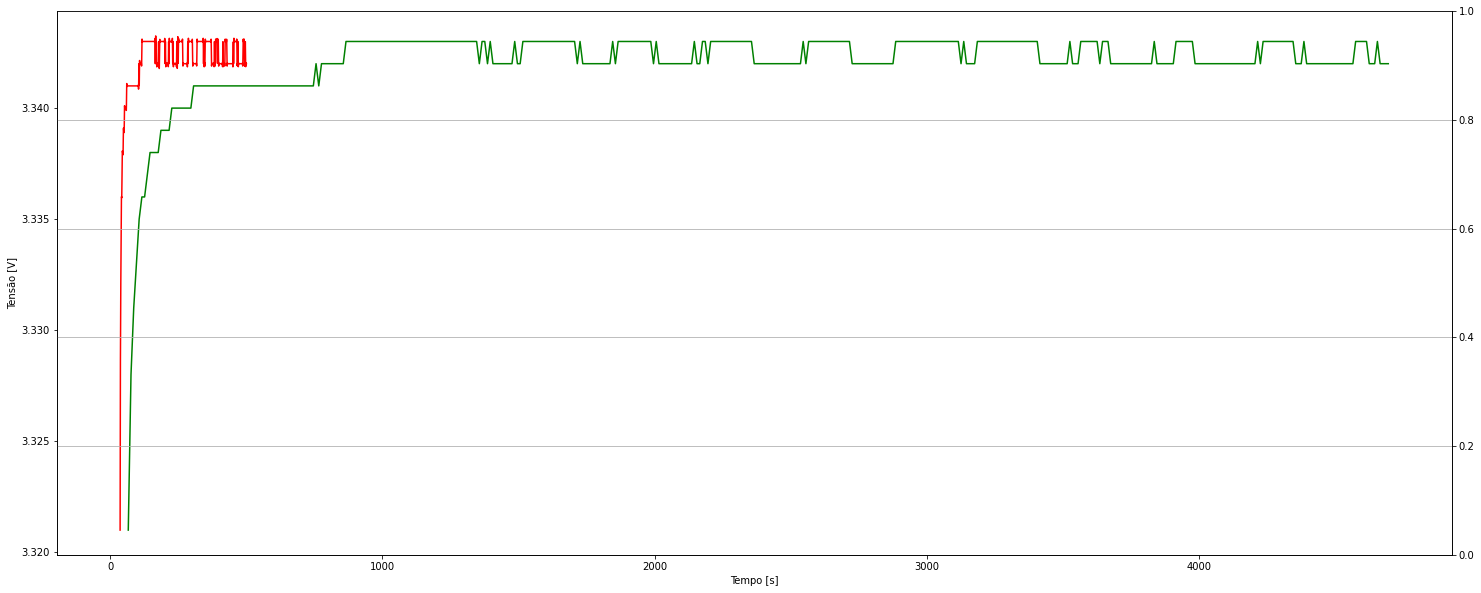

In [80]:
plt.figure(figsize=(25, 10))
ax = sns.lineplot(data=df_c100[36:500].to_pandas(), x='Tempo [s]', y='Tensão [V]', color='green')
ax = sns.lineplot(x=t0, y=x0, color='red')
ax2 = ax.twinx()
#sns.lineplot(data=df_c100[36:1100].to_pandas(), x='Tempo [s]', y='Corrente [A]', ax=ax2, color='red')
ax2.grid()
plt.show()
plt.close()

In [48]:
df_c100.to_pandas().diff()

,Tempo [s],Corrente [A],Tensão [V]
0,NaN,NaN,NaN
1,1.0,0.000,0.000
2,1.0,0.000,0.000
3,1.0,0.000,0.000
4,1.0,0.000,0.000
...,...,...,...
178803,60.0,0.000,-0.010
178804,120.0,25.938,0.051
178805,60.0,-0.626,0.085
178806,42.2,-0.722,0.104


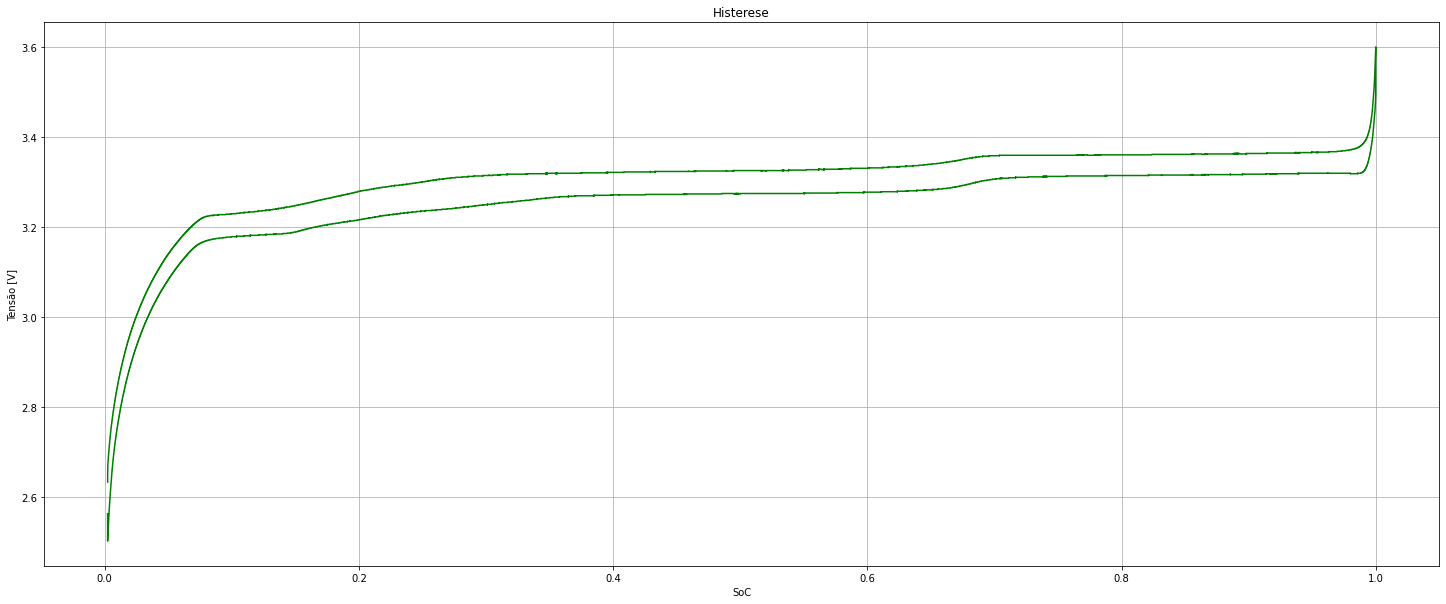

In [39]:
plt.figure(figsize=(25, 10))
ax = sns.lineplot(data=df_soc.to_pandas(), x='SoC', y='Tensão [V]', color='green', sort=False)
plt.grid()
plt.title('Histerese')
plt.show()
plt.close()

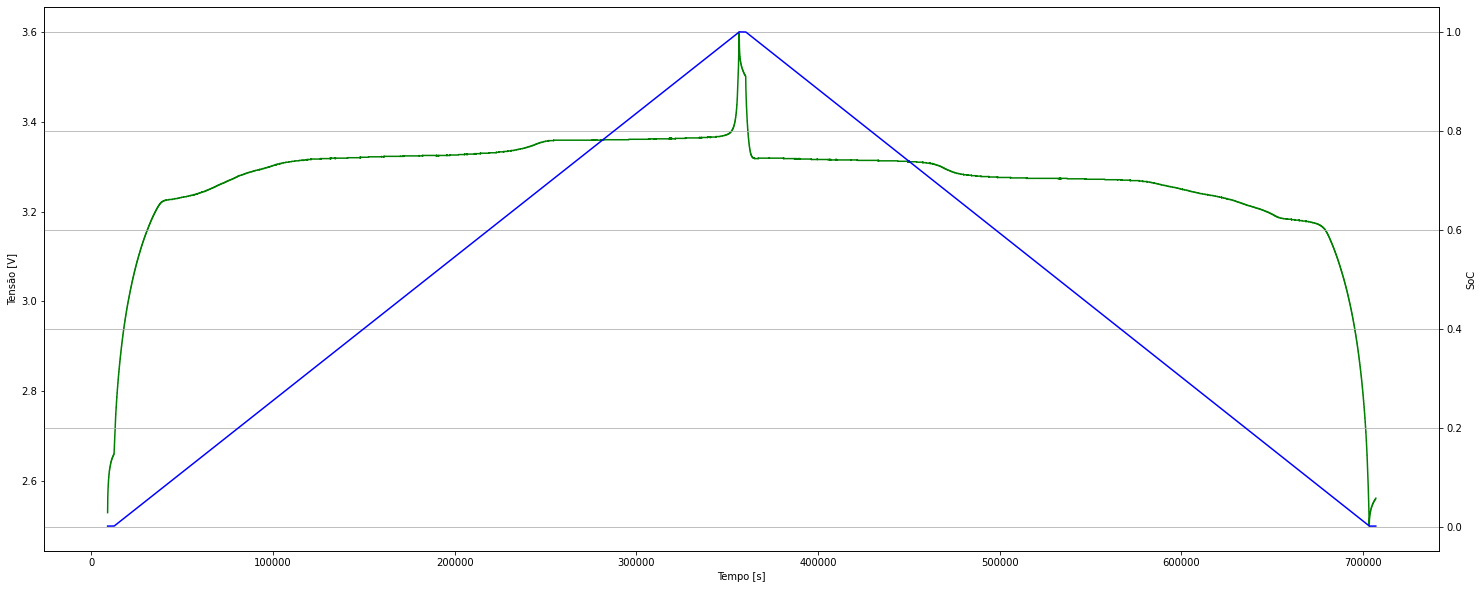

In [40]:
plt.figure(figsize=(25, 10))
ax = sns.lineplot(data=df_soc.to_pandas(), x='Tempo [s]', y='Tensão [V]', color='green')
ax2 = ax.twinx()
sns.lineplot(data=df_soc.to_pandas(), x='Tempo [s]', y='SoC', ax=ax2, color='blue')
ax2.grid()
plt.show()
plt.close()